In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

tweets = pd.read_csv('csv/train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Lleno los valores nulos con 'Not Especified' esto denotara que la keyword o la locacion no fueron especificadas en el tweet 

In [2]:
tweets = tweets.fillna(value= 'Not Especified')

In [3]:
tweets['cuantity'] = 1
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   cuantity  7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


In [4]:
target = tweets[['target', 'cuantity']]
target = target.groupby('target').sum()
target =target.reset_index()
target.head()

,target,cuantity
0,0,4342
1,1,3271


In [5]:
tweets['location_especificada'] = (tweets['location']!='Not Especified')

In [6]:
fue_la_locacion_especificada = tweets[['cuantity', 'location_especificada']]
fue_la_locacion_especificada = fue_la_locacion_especificada.groupby('location_especificada').sum()
fue_la_locacion_especificada = fue_la_locacion_especificada.reset_index()
fue_la_locacion_especificada

,location_especificada,cuantity
0,False,2533
1,True,5080


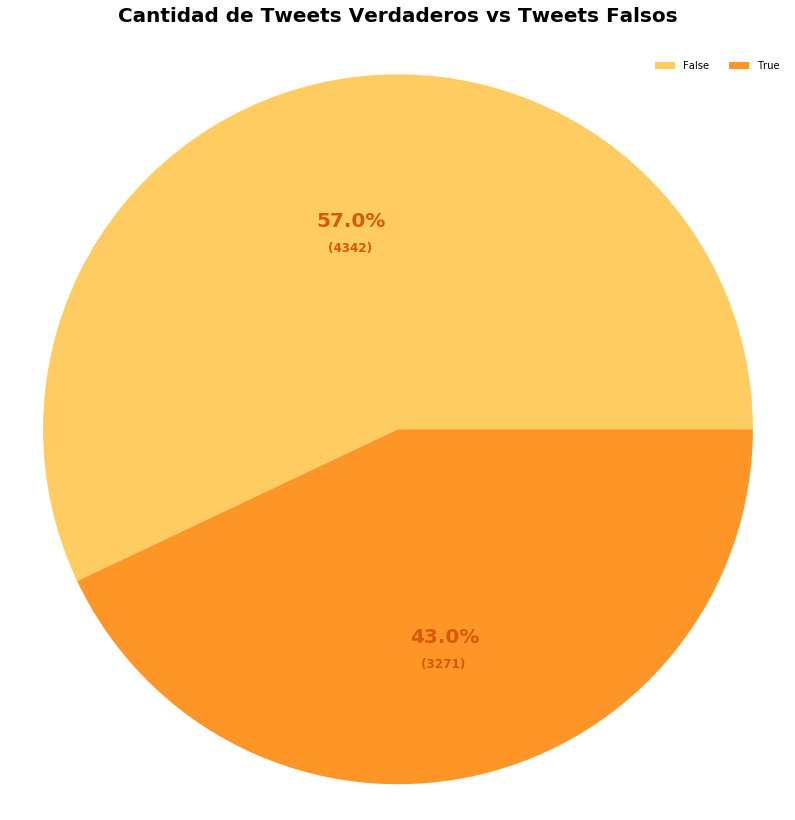

In [7]:
cmap = cm.get_cmap('YlOrBr')
saltos = np.linspace(0.3, 0.7, 20)
colores = cmap(saltos)

plt.figure(figsize=(14,14))
pie_chart = plt.subplot()


a,b, autotexts = pie_chart.pie(target['cuantity'], colors= [colores[2], colores[10]], autopct='%1.1f%%')

for autotext in autotexts:
    autotext.set_color(color=colores[19])
    autotext.set_fontsize(20)
    autotext.set_fontweight('bold')

cantidad = target['cuantity']
pie_chart.text(-0.198, 0.5, '(' +str(cantidad[0])+')', color=colores[19], fontweight='bold', fontsize=12)  
pie_chart.text(0.065, -0.67, '(' +str(cantidad[1])+')', color=colores[19], fontweight='bold', fontsize=12) 
pie_chart.legend(fue_la_locacion_especificada['location_especificada'], frameon=False, loc='best', ncol=2)
plt.title('Cantidad de Tweets Verdaderos vs Tweets Falsos', weight='bold', size=20, pad=30)
plt.axis('equal')
plt.show()

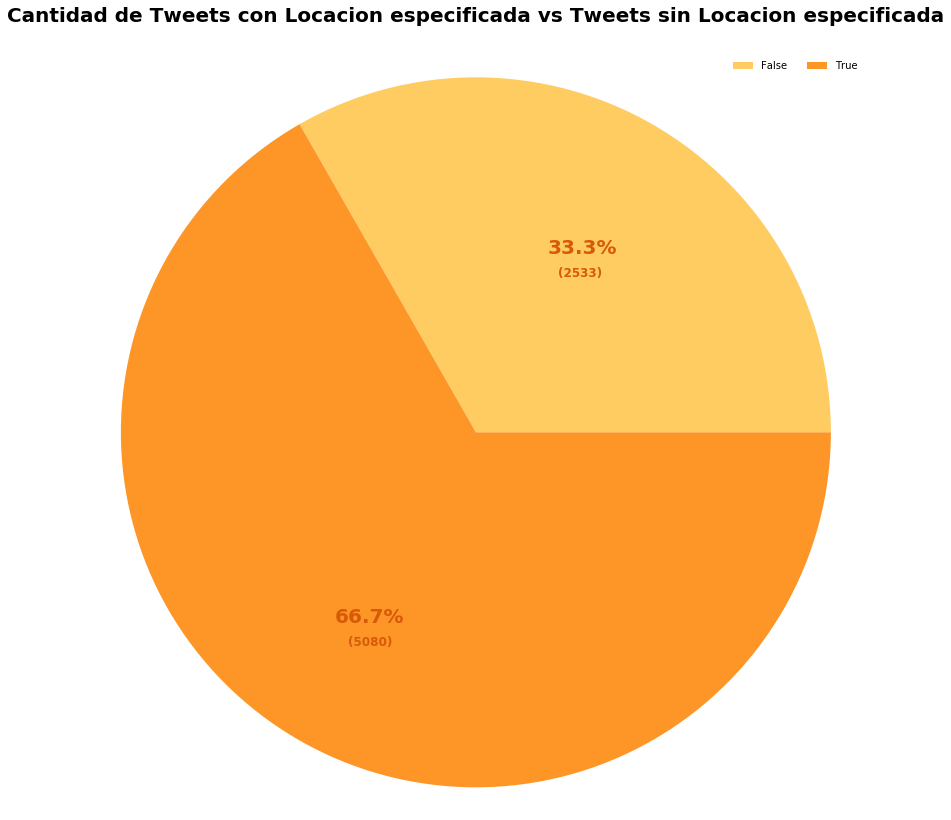

In [8]:
cmap = cm.get_cmap('YlOrBr')
saltos = np.linspace(0.3, 0.7, 20)
colores = cmap(saltos)

plt.figure(figsize=(14,14))
pie_chart = plt.subplot()


a, b,autotexts= pie_chart.pie(fue_la_locacion_especificada['cuantity'], colors= [colores[2], colores[10]], autopct='%1.1f%%')
for autotext in autotexts:
    autotext.set_color(color=colores[19])
    autotext.set_fontsize(20)
    autotext.set_fontweight('bold')
cantidad = fue_la_locacion_especificada['cuantity']
pie_chart.text(0.23, 0.44, '(' +str(cantidad[0])+')', color=colores[19], fontweight='bold', fontsize=12)  
pie_chart.text(-0.36, -0.6, '(' +str(cantidad[1])+')', color=colores[19], fontweight='bold', fontsize=12) 
pie_chart.legend(fue_la_locacion_especificada['location_especificada'], frameon=False, loc='best', ncol=2)
plt.title('Cantidad de Tweets con Locacion especificada vs Tweets sin Locacion especificada', weight='bold', size=20, pad=30)
plt.axis('equal')
plt.show()

Creo una nueva columna en el df principal con la longitud del Tweet para relacionarlo posteriormente con la locacion

In [29]:
tweets['text lenght'] = tweets['text'].str.len()

In [10]:
tweets_by_loc = tweets[['location', 'target', 'text lenght', 'cuantity']]
tweets_by_loc = tweets_by_loc.groupby('location').sum()
tweets_by_loc.sample(n=10)

,target,text lenght,cuantity
location,,,
lagos nigeria,1,94,1
"North Highlands, CA",1,99,1
"Fort Valley,GA/Fayetteville,AR",1,122,1
CLVLND,0,140,1
"Athens, Greece",1,110,1
somewhere in Portugal,0,122,1
"Washington, DC",15,2430,21
fluffy cloud,0,32,1
Hampshire UK,0,123,1


In [11]:
tweets_by_loc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3342 entries,    to åø\_(?)_/åø
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   target       3342 non-null   int64
 1   text lenght  3342 non-null   int64
 2   cuantity     3342 non-null   int64
dtypes: int64(3)
memory usage: 104.4+ KB


In [12]:
#Calculo el factor de veracidad para cada tweet y lor ordeno por dicho factor en orden descendiente
tweets_by_loc['Veracidad'] = tweets_by_loc['target'] / tweets_by_loc['cuantity']
tweets_by_loc = tweets_by_loc.sort_values('Veracidad', ascending = False)
tweets_by_loc.tail(10)

,target,text lenght,cuantity,Veracidad
location,,,,
Pittsburgh PA,0,136,1,0.0
Pittsburgh,0,27,1,0.0
Pittsburgh,0,141,2,0.0
"Honolulu,Hawaii",0,48,1,0.0
BestCoast,0,114,1,0.0
Between Dire and Radiant,0,39,1,0.0
Between the worlds,0,70,1,0.0
Photo : Blue Mountains,0,139,1,0.0
Hooters on Peachtree,0,56,1,0.0


In [13]:
#Me quedo solo con las locaciones que tienen mas de 10 Tweets 
does_the_location_has_more_than_10_tweets = (tweets_by_loc['cuantity'] > 10)
locations_with_more_than_10_tweets = tweets_by_loc[does_the_location_has_more_than_10_tweets]
del locations_with_more_than_10_tweets['target']
#lar ordeno descendientemente por su factor de veracidad y reseteo el index a fines de poder graficar
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.sort_values('Veracidad', ascending =True)
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.reset_index()
locations_with_more_than_10_tweets.head(10)

,location,text lenght,cuantity,Veracidad
0,NYC,1406,12,0.166667
1,Everywhere,1335,15,0.200000
2,Florida,1540,14,0.214286
3,New York,9234,71,0.225352
4,Kenya,2635,20,0.250000
5,United Kingdom,1400,14,0.285714
6,"Los Angeles, CA",2969,26,0.307692
7,London,4820,45,0.355556
8,Chicago,1229,11,0.363636
9,Seattle,1392,11,0.363636


In [14]:
tweets_by_loc = tweets_by_loc.reset_index()
tweets_by_loc.tail()

,location,target,text lenght,cuantity,Veracidad
3337,Between Dire and Radiant,0,39,1,0.0
3338,Between the worlds,0,70,1,0.0
3339,Photo : Blue Mountains,0,139,1,0.0
3340,Hooters on Peachtree,0,56,1,0.0
3341,Edinburgh,0,482,4,0.0


In [15]:
#multiplico el factor de veracidad por 100 a fines de poder graficar, ahora es un porcentaje de veracidad
locations_with_more_than_10_tweets['Porcentaje De Veracidad'] = locations_with_more_than_10_tweets['Veracidad'] * 100

Text(0.5, 1.0, 'Top 10 Locaciones con Mayor Ratio de Tweets Veraces')

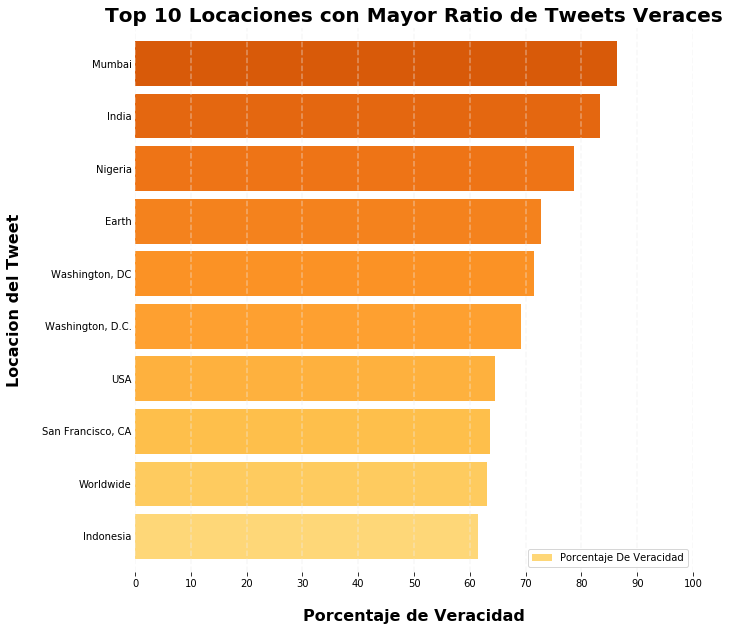

In [16]:

saltos = np.linspace(0.3, 0.7, 10)
colores = (cm.get_cmap('YlOrBr'))(saltos)
locations_with_more_than_10_tweets_plot = locations_with_more_than_10_tweets.tail(10).plot(kind='barh', y ='Porcentaje De Veracidad', x = 'location', figsize=(10,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.tick_params(axis='y', length=0)

locations_with_more_than_10_tweets_plot.spines['right'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['top'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['left'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = locations_with_more_than_10_tweets_plot.get_xticks()
for i in lineas:
      locations_with_more_than_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
locations_with_more_than_10_tweets_plot.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_title("Top 10 Locaciones con Mayor Ratio de Tweets Veraces", weight='bold', size=20)


In [17]:
tweets_by_loc.sort_values('target', ascending = False).head(11)

,location,target,text lenght,cuantity,Veracidad
1429,Not Especified,1075,249413,2533,0.424398
1265,USA,67,11285,104,0.644231
1283,United States,27,5001,50,0.540000
1209,Nigeria,22,3360,28,0.785714
1203,India,20,2470,24,0.833333
1199,Mumbai,19,2740,22,0.863636
1498,New York,16,9234,71,0.225352
1440,London,16,4820,45,0.355556
1278,UK,16,3133,27,0.592593
1224,"Washington, DC",15,2430,21,0.714286


In [18]:
#me quedo con las 10 locaciones con mayor cantidad de Tweets verdaderos
top_10_tweets_by_loc = (tweets_by_loc.loc[:,'target'] >= 13)
top_10 = tweets_by_loc.loc[top_10_tweets_by_loc]
top_10.sort_values('target', ascending = False).head(15)

,location,target,text lenght,cuantity,Veracidad
1429,Not Especified,1075,249413,2533,0.424398
1265,USA,67,11285,104,0.644231
1283,United States,27,5001,50,0.540000
1209,Nigeria,22,3360,28,0.785714
1203,India,20,2470,24,0.833333
1199,Mumbai,19,2740,22,0.863636
1278,UK,16,3133,27,0.592593
1440,London,16,4820,45,0.355556
1498,New York,16,9234,71,0.225352
1224,"Washington, DC",15,2430,21,0.714286


In [19]:
specified_location = (tweets_by_loc.loc[:,'location'] != 'Not Especified')
top_10 = top_10.loc[specified_location]
top_10.head(15)

,location,target,text lenght,cuantity,Veracidad
1199,Mumbai,19,2740,22,0.863636
1203,India,20,2470,24,0.833333
1209,Nigeria,22,3360,28,0.785714
1224,"Washington, DC",15,2430,21,0.714286
1265,USA,67,11285,104,0.644231
1278,UK,16,3133,27,0.592593
1283,United States,27,5001,50,0.540000
1423,Canada,13,3070,29,0.448276
1440,London,16,4820,45,0.355556
1498,New York,16,9234,71,0.225352


Text(0.5, 1.0, 'Top 10 de Locaciones con mayor cantidad de Tweets Verdaderos')

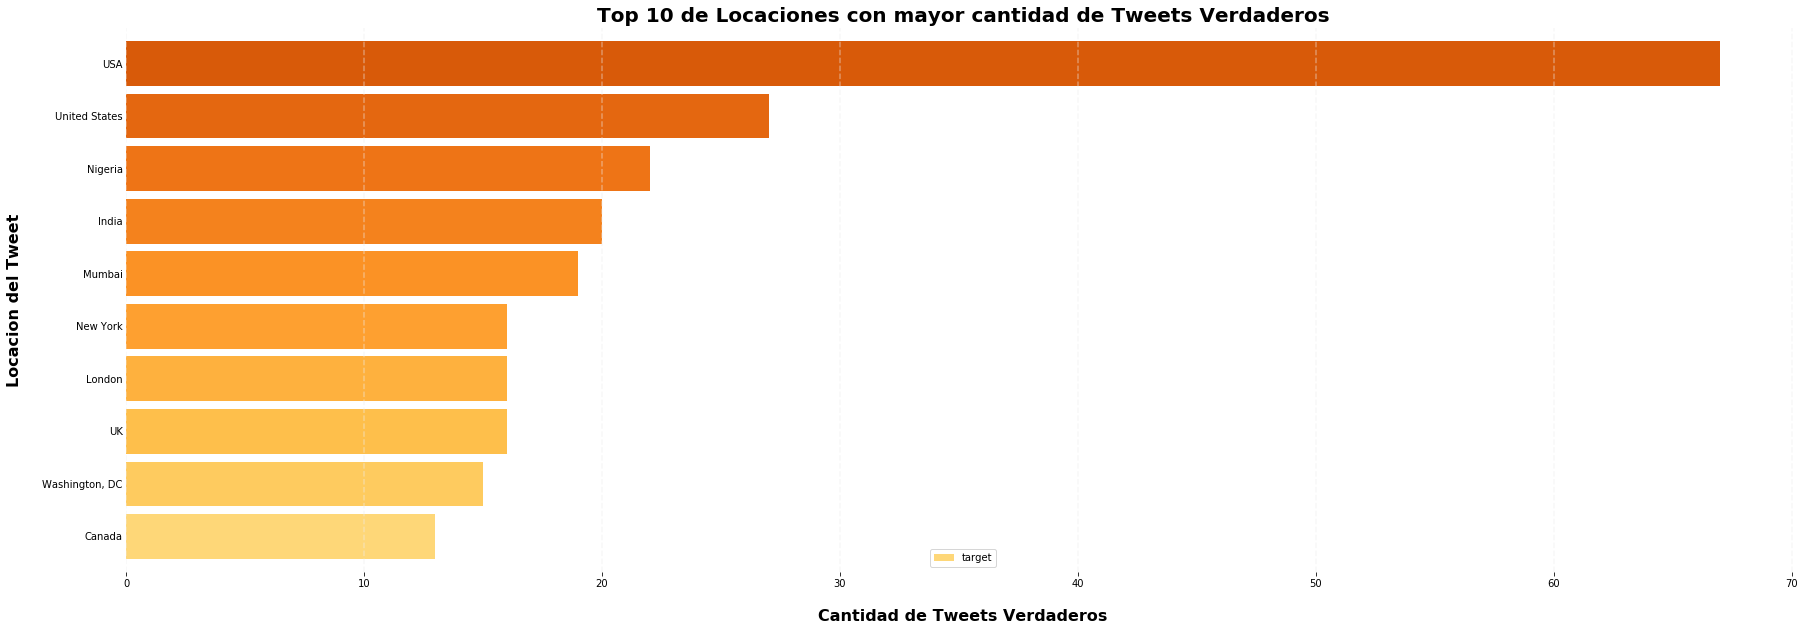

In [20]:
saltos = np.linspace(0.3, 0.7, 10)
colores = (cm.get_cmap('YlOrBr'))(saltos)
top_10 = top_10.sort_values('target')
top10_plot = top_10.plot(kind='barh', y ='target', x = 'location', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 71, 10.0))
plt.tick_params(axis='y', length=0)

top10_plot.spines['right'].set_visible(False)
top10_plot.spines['top'].set_visible(False)
top10_plot.spines['left'].set_visible(False)
top10_plot.spines['bottom'].set_visible(False)

lineas = top10_plot.get_xticks()
for i in lineas:
      top10_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top10_plot.set_xlabel("Cantidad de Tweets Verdaderos", labelpad=20, weight='bold', size=16)
top10_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
top10_plot.set_title("Top 10 de Locaciones con mayor cantidad de Tweets Verdaderos", weight='bold', size=20)

In [24]:
is_false = []
for item in tweets['target']:
    is_false.append(1 if item == 0 else 0)

In [27]:
false_tweets = tweets[['location', 'cuantity']] 
false_tweets['is false'] = is_false
false_tweets = false_tweets.groupby('location').sum()
false_tweets.sample(n=15)

In [28]:
false_tweets.head()

,location,cuantity
0,Not Especified,1
1,Not Especified,1
2,Not Especified,1
3,Not Especified,1
4,Not Especified,1


In [ ]:
#calculo el porcentaje de tweets que son falsos del total de tweets para cada locacion
false_tweets['Porcentaje de Falsedad'] = (false_tweets['is false'] / false_tweets['cuantity']) *100
false_tweets.head(10)

In [ ]:
#de las locaciones que tengoo me quedo solo con las que tienen mas de 10 Tweets 
has_more_tweets_than_10_tweets = (false_tweets['cuantity'] > 10)
locations_with_more_than_10_false_tweets = false_tweets[has_more_tweets_than_10_tweets]
locations_with_more_than_10_false_tweets = locations_with_more_than_10_false_tweets.sort_values('Porcentaje de Falsedad', ascending =True)
locations_with_more_than_10_false_tweets = locations_with_more_than_10_false_tweets.reset_index()
locations_with_more_than_10_false_tweets.head(10)

In [ ]:
saltos = np.linspace(0.3, 0.7, 10)
colores = (cm.get_cmap('YlOrBr'))(saltos)
top10_plot = locations_with_more_than_10_false_tweets.tail(10).plot(kind='barh', y ='Porcentaje de Falsedad', x = 'location', figsize=(10,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 101, 10.0))
plt.tick_params(axis='y', length=0)

top10_plot.spines['right'].set_visible(False)
top10_plot.spines['top'].set_visible(False)
top10_plot.spines['left'].set_visible(False)
top10_plot.spines['bottom'].set_visible(False)

lineas = top10_plot.get_xticks()
for i in lineas:
      top10_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top10_plot.set_xlabel("Porcetaje de Tweets Falsos", labelpad=20, weight='bold', size=16)
top10_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
top10_plot.set_title("Top 10 de Locaciones con Mayor Ratio de Tweets Falsos", weight='bold', size=20)

In [ ]:
#De las locaciones con mas de 10 tweets, calculo cual es el promedio de longitud del texto para cada locacion
locations_with_more_than_10_tweets['Longitud Promedio'] = locations_with_more_than_10_tweets['text lenght'] / locations_with_more_than_10_tweets['cuantity']
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.sort_values('Longitud Promedio')
locations_with_more_than_10_tweets.head()

In [ ]:
saltos = np.linspace(0.3, 0.7, 33)
colores = (cm.get_cmap('YlOrBr'))(saltos)
locations_with_more_than_10_tweets_plot = locations_with_more_than_10_tweets.plot(kind='barh', y ='Longitud Promedio', x = 'location', figsize=(20,20), color=colores, width=0.85)

plt.xticks(np.arange(0, 130+1, 10.0))
plt.tick_params(axis='y', length=0)

locations_with_more_than_10_tweets_plot.spines['right'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['top'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['left'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = locations_with_more_than_10_tweets_plot.get_xticks()
for i in lineas:
      locations_with_more_than_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
locations_with_more_than_10_tweets_plot.set_xlabel("Longitud del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_title("Longitud Promedio de Tweets Por Locacion", weight='bold', size=20)

In [ ]:
#Creo un df en donde la columna de cantidad me indica las veces que aparecio cierta keyword y la ordeno descendentemente por las keywords que mas salieron
keywords_mas_usadas = tweets.groupby('keyword').sum().sort_values('cuantity', ascending = False).head(30)
keywords_mas_usadas = keywords_mas_usadas.reset_index()
keywords_mas_usadas.head()

In [ ]:
#creo una serie en la que me quedo solo con las 30 keywords mas usadas
keywords_mas_usadas_serie = pd.Series(keywords_mas_usadas['keyword'].values)
keywords_mas_usadas_serie

In [ ]:
cantidad_de_tweets_por_locacion = tweets.groupby('location').sum().sort_values('cuantity', ascending = False)
tiene_mas_de_10_tweets = (cantidad_de_tweets_por_locacion['cuantity'] > 10)
locaciones_con_mas_de_10_tweets = cantidad_de_tweets_por_locacion[tiene_mas_de_10_tweets]
locaciones_con_mas_de_10_tweets = locaciones_con_mas_de_10_tweets.reset_index()
locaciones_con_mas_de_10_tweets.head()

In [ ]:
#creo un df llamado scatter (para hacer un scatter plot) donde me quedo solo con los tweets que usan las 30 keywords mas usadas
does_tweet_has_frecuent_keyword = tweets['keyword'].isin(keywords_mas_usadas_serie)
scatter = tweets[does_tweet_has_frecuent_keyword]
scatter['keyword'].value_counts()

In [ ]:
#de los Tweets que tienen las keywords mas usadas me quedo solo con aquellos que tienen mas de 10 tweets
does_location_has_more_than_10_tweets = scatter['location'].isin(locaciones_con_mas_de_10_tweets['location'])
scatter = scatter[does_location_has_more_than_10_tweets]
del scatter['id']
del scatter['text lenght']
del scatter['target']
scatter.info()

In [ ]:
#los agrupo por location y keyword y sumo, con lo que consigo saber que tanto aparece cada par (locacion, keyword) 
scatter = scatter.groupby(['location', 'keyword']).sum().sort_values('cuantity', ascending=False)
scatter = scatter.reset_index()

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
g = sns.scatterplot(x = "keyword", y = "location", size='cuantity', color='orange',  data= scatter)
g.set_title("Scatter Plot Locacion Vs Keyword", fontsize=22)
g.set_xlabel("Keyword",fontsize=15)
g.set_ylabel("Locacion", fontsize=15)